# MASTER - Notebook 1
### Matteo Grazioso 884055

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Create a requirements.txt file
!pip freeze > requirements.txt


In [78]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [79]:
# The data is in the same directory as the notebook and is named 'validazioni.txt'. 
# The file contains the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file
df = pd.read_csv('data/dataset_1.txt', header=0, sep='\t')

In [80]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,13/05/2022 00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
1,13/05/2022 00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10"
2,13/05/2022 00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60"
3,13/05/2022 00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC
4,13/05/2022 00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC


In [81]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
7620386,16/03/2023 07:32,65693774276295173,1030,Miranese Iva,12101,Bigl.Aut.75'Mestre/Lido-tsc
7620387,16/03/2023 07:34,65693843025590021,2997,Valli via Po,7001,ARRIVA VENETO tratta 1
7620388,16/03/2023 07:36,40551532117920004,1033,Miranese Laz,12101,Bigl.Aut.75'Mestre/Lido-tsc
7620389,16/03/2023 07:47,65694182849607941,1316,Trieste Robi,12101,Bigl.Aut.75'Mestre/Lido-tsc
7620390,16/03/2023 07:48,40835096054726916,611,Giovannacci,12101,Bigl.Aut.75'Mestre/Lido-tsc


## Explorative Data Analysis


In [82]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2022-05-13,00:00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
1,2022-05-13,00:00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10"
2,2022-05-13,00:00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60"
3,2022-05-13,00:00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC
4,2022-05-13,00:00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC


In [83]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2022-05-13 00:00:00 00:00:00
Last validation:  2023-03-16 00:00:00 23:59:00
Number of Serial numbers:  3165531
Number of validation:  7620391
Number of tickets:  215
Number of titolo:  193
Number of FERMATA:  1877
Number of DESCRIZIONE:  1117


In [84]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

DAILY PASS VENEZIA - AVM         972478
Bigl.Aut.75'Mestre/Lido-tsc      758048
75'-Tpl 6,64-ComVe0,86           754908
48h-Tpl 24,90-ComVe5,10          600320
DailyP-Tpl19,90-C.Ve5,10         533962
72h-Tpl 33,40-ComVe6,60          492911
75'-Tpl 8,64-ComVe0,86           460128
7gg-Tpl 43,60-ComVe16,40         342870
48h-Tpl 29,90-ComVe5,10          285170
Biglietto 72 ore Roll. Venice    234421
Name: DESCRIZIONE_TITOLO, dtype: int64

In [85]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2022-05-17  03:38:00    383
2022-05-18  03:38:00    362
2022-06-04  15:27:00    258
2022-05-27  17:25:00    258
2022-06-03  16:28:00    254
2022-05-27  10:26:00    250
            10:54:00    249
2022-06-04  16:26:00    247
2022-05-27  11:14:00    246
            10:10:00    242
Name: SERIALE, dtype: int64

In [86]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

San Marco-Sa    734939
VENEZIA         399457
Rialto          346023
P.le Roma "G    324432
LIDO S.M.E.     274706
BURANO "C"      248780
FERROVIA "B"    194802
PEOPLE MOVER    158284
Burano "C"      147820
P.le Roma "E    145798
Name: DESCRIZIONE, dtype: int64

## Categories

In [87]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

# This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:
# 1. One-day ticket
# 2. Two-day ticket
# 3. Three-day ticket
# 4. Weekly ticket (Seven-day ticket)
# 5. Monthly ticket
# 6. Annual ticket
# 7. Other ticket (if it is necessary to add other types of tickets)


In [88]:
df.head()

,DATA,ORA,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO,TICKET_CODE
0,2022-05-13,00:00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40",TBD
1,2022-05-13,00:00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10",TBD
2,2022-05-13,00:00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60",TBD
3,2022-05-13,00:00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC,TBD
4,2022-05-13,00:00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC,TBD


In [89]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', '5': 'Monthly ticket', '6': 'Annual ticket',
                '7': 'Other ticket', '7a': '75 minutes', '7b': 'B_Other ticket'}
# Export the dictionary to a json file
import json
with open('dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [90]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

215

In [91]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(['7gg-Tpl 43,60-ComVe16,40', '48h-Tpl 24,90-ComVe5,10',
       '72h-Tpl 33,40-ComVe6,60', 'Bigl Aer-Venezia TSC',
       'DAILY PASS VENEZIA - AVM', '72H R.Venice+aerop.AR online',
       "75'-Tpl 6,64-ComVe0,86", 'Biglietto 72 ore Roll. Venice',
       "Bigl.Aut.75'Mestre/Lido-tsc", 'Aer+boat-Tpl14,50-C.Ve1,50',
       '72hAerCS-Tpl40,40-CVe6,60', 'Aeroporto-Venezia AR',
       '72 ore R.Venice online', '7 days online no aerobus',
       '72hAerAR-Tpl46,40-CVe6,60', '48hAerCS-Tpl31,90-CVe5,10',
       'Bicicletta "Palmare"', 'L.17-auto "C"da 4,01 a 4,50 mt',
       '72ore online no aerobus', 'L.17-auto "AeB" fino a 4 metri',
       '48ore online no aerobus', "75'-Tpl 13,28-ComVe1,72",
       'Extra tratta 4 ', '48ore online aerobus AR',
       'Daily Pass Venezia Online', 'Ferry17-carri+35q.rim.',
       'Ferry17-autocarri+35q.', 'Ferry11-autocarri+35q.',
       'Extra tratta 5 ', 'L.17-auto "D" oltre metri 4,50',
       'Extra tratta 2 ', 'Ciclomotore fino 50cc',
       'Bicicl

In [92]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  215


In [93]:
df['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
Bigl.Aut.75'Mestre/Lido-tsc       758048
75'-Tpl 6,64-ComVe0,86            754908
48h-Tpl 24,90-ComVe5,10           600320
DailyP-Tpl19,90-C.Ve5,10          533962
72h-Tpl 33,40-ComVe6,60           492911
75'-Tpl 8,64-ComVe0,86            460128
7gg-Tpl 43,60-ComVe16,40          342870
48h-Tpl 29,90-ComVe5,10           285170
Biglietto 72 ore Roll. Venice     234421
75'-Tpl 13,28-ComVe1,72           232644
72h-Tpl 38,40-ComVe6,60           205565
72ore online no aerobus           165984
7 days online no aerobus          137359
PeopleMover+Bus+Tram 75'          132532
Bigl Aer-Venezia TSC              123269
7gg-Tpl 48,60-ComVe16,40          112186
48ore online no aerobus            97464
72 ore R.Venice online             92527
Extra tratta 2                     72749
Daily Pass Venezia Online          54649
Extra tratta 3                     45570
Tragh-Tpl 8,82-C.Ve1,18            38351
Extra tratta 4                     25670
Cav -Trep + Actv

In [94]:
# How many tickets are there for each type?
# Print the count and the average of validation for each ticket type
df.groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H metropolitano ORD online,147.0,2.959184,2.093295,1.0,2.00,2.0,3.50,11.0
24H metropolitano ORD+1 online,62.0,3.854839,1.998744,1.0,3.00,4.0,5.00,13.0
24H metropolitano ORD+2 online,75.0,4.613333,3.533214,1.0,2.00,4.0,5.50,20.0
24h online aerobus CS 1 mese,3.0,2.666667,2.886751,1.0,1.00,1.0,3.50,6.0
24h-24 ore,146.0,2.417808,1.604979,1.0,1.00,2.0,3.00,10.0
"24hAerAR-Tpl28,90-CVe5,10",299.0,4.043478,2.642220,1.0,2.00,4.0,5.00,24.0
"24hAerAR-Tpl32,90-CVe5,10",113.0,4.300885,2.942560,1.0,2.00,4.0,7.00,13.0
"24hAerCS-Tpl22,90-CVe5,10",2092.0,3.847036,2.333202,1.0,2.00,4.0,5.00,16.0
"24hAerCS-Tpl26,90-CVe5,10",953.0,4.475341,2.553559,1.0,3.00,4.0,6.00,21.0


### One-day tickets

In [95]:
# Which type of ticket are one-day tickets and how many are there?
# Exclude the tickets that contains also 48h or 72h
df[df['DESCRIZIONE_TITOLO'].str.contains('giornaliero|24h|24 ore|24|Daily|daily|DAILY') & ~df['DESCRIZIONE_TITOLO'].str.contains('48|72')]['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
DailyP-Tpl19,90-C.Ve5,10          533962
Daily Pass Venezia Online          54649
Cav -Trep + Actv 24H               25155
Jesolo + Actv 24H                  17944
NA-24H metropolitano ORD+2         17203
NA-24H metropolitano ORD+1         15662
24hAerCS-Tpl22,90-CVe5,10           8048
24hAerCS-Tpl26,90-CVe5,10           4265
T.Fusina Ve+ACTV 24 ore             4193
24ore online aerobus CS             1332
Caorle-P.S.Margh. + Actv 24H        1297
Daily Pass Ve. Online 1mese         1287
24hAerAR-Tpl28,90-CVe5,10           1209
Bibione + Actv 24H                   845
NA-24h-Tpl 14,90-Com.Ve5,10          532
24ore online no aerobus              494
24hAerAR-Tpl32,90-CVe5,10            486
24H metropolitano ORD online         435
24ore online aerobus AR              404
24h-24 ore                           353
24H metropolitano ORD+2 online       346
24H metropolitano ORD+1 online       239
EracleaMare + Actv 24H               204
NA-24H metropoli

In [96]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('giornaliero|24h|24 ore|24|Daily|daily|DAILY') & ~df['DESCRIZIONE_TITOLO'].str.contains('48|72'), 'TICKET_CODE'] = '1'

In [97]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  1663234
The number of tickets for each type of one-day ticket is: 


DAILY PASS VENEZIA - AVM          972478
DailyP-Tpl19,90-C.Ve5,10          533962
Daily Pass Venezia Online          54649
Cav -Trep + Actv 24H               25155
Jesolo + Actv 24H                  17944
NA-24H metropolitano ORD+2         17203
NA-24H metropolitano ORD+1         15662
24hAerCS-Tpl22,90-CVe5,10           8048
24hAerCS-Tpl26,90-CVe5,10           4265
T.Fusina Ve+ACTV 24 ore             4193
24ore online aerobus CS             1332
Caorle-P.S.Margh. + Actv 24H        1297
Daily Pass Ve. Online 1mese         1287
24hAerAR-Tpl28,90-CVe5,10           1209
Bibione + Actv 24H                   845
NA-24h-Tpl 14,90-Com.Ve5,10          532
24ore online no aerobus              494
24hAerAR-Tpl32,90-CVe5,10            486
24H metropolitano ORD online         435
24ore online aerobus AR              404
24h-24 ore                           353
24H metropolitano ORD+2 online       346
24H metropolitano ORD+1 online       239
EracleaMare + Actv 24H               204
NA-24H metropoli

In [98]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H metropolitano ORD online,147.0,2.959184,2.093295,1.0,2.00,2.0,3.50,11.0
24H metropolitano ORD+1 online,62.0,3.854839,1.998744,1.0,3.00,4.0,5.00,13.0
24H metropolitano ORD+2 online,75.0,4.613333,3.533214,1.0,2.00,4.0,5.50,20.0
24h online aerobus CS 1 mese,3.0,2.666667,2.886751,1.0,1.00,1.0,3.50,6.0
24h-24 ore,146.0,2.417808,1.604979,1.0,1.00,2.0,3.00,10.0
"24hAerAR-Tpl28,90-CVe5,10",299.0,4.043478,2.642220,1.0,2.00,4.0,5.00,24.0
"24hAerAR-Tpl32,90-CVe5,10",113.0,4.300885,2.942560,1.0,2.00,4.0,7.00,13.0
"24hAerCS-Tpl22,90-CVe5,10",2092.0,3.847036,2.333202,1.0,2.00,4.0,5.00,16.0
"24hAerCS-Tpl26,90-CVe5,10",953.0,4.475341,2.553559,1.0,3.00,4.0,6.00,21.0


### Two days tickets

In [99]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48')]['DESCRIZIONE_TITOLO'].value_counts()

48h-Tpl 24,90-ComVe5,10         600320
48h-Tpl 29,90-ComVe5,10         285170
7gg-Tpl 48,60-ComVe16,40        112186
48ore online no aerobus          97464
48hAerCS-Tpl31,90-CVe5,10         9889
48hAerCS-Tpl36,90-CVe5,10         4857
48ore online aerobus CS           3497
48hAerAR-Tpl37,90-CVe5,10         3312
48hAerAR-Tpl42,90-CVe5,10         2920
48ore online aerobus AR           2757
48h online no aerobus 1mese       2576
48h online aerobus CS 1 mese       322
48h online aerobus AR 1 mese       104
Name: DESCRIZIONE_TITOLO, dtype: int64

In [100]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48'), 'TICKET_CODE'] = '2'

In [101]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  1125374
The number of tickets for each type of two-day ticket is: 


48h-Tpl 24,90-ComVe5,10         600320
48h-Tpl 29,90-ComVe5,10         285170
7gg-Tpl 48,60-ComVe16,40        112186
48ore online no aerobus          97464
48hAerCS-Tpl31,90-CVe5,10         9889
48hAerCS-Tpl36,90-CVe5,10         4857
48ore online aerobus CS           3497
48hAerAR-Tpl37,90-CVe5,10         3312
48hAerAR-Tpl42,90-CVe5,10         2920
48ore online aerobus AR           2757
48h online no aerobus 1mese       2576
48h online aerobus CS 1 mese       322
48h online aerobus AR 1 mese       104
Name: DESCRIZIONE_TITOLO, dtype: int64

In [102]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
48h online aerobus AR 1 mese,15.0,6.933333,3.575046,3.0,4.50,6.0,9.0,17.0
48h online aerobus CS 1 mese,38.0,8.473684,3.523948,2.0,6.25,8.0,12.0,15.0
48h online no aerobus 1mese,372.0,6.924731,3.370993,1.0,5.00,7.0,9.0,19.0
"48h-Tpl 24,90-ComVe5,10",94201.0,6.372756,3.520071,1.0,4.00,6.0,8.0,68.0
"48h-Tpl 29,90-ComVe5,10",42812.0,6.660983,3.586267,1.0,4.00,6.0,9.0,41.0
"48hAerAR-Tpl37,90-CVe5,10",405.0,8.177778,4.356968,1.0,5.00,7.0,11.0,28.0
"48hAerAR-Tpl42,90-CVe5,10",366.0,7.978142,3.554594,1.0,6.00,8.0,10.0,20.0
"48hAerCS-Tpl31,90-CVe5,10",1378.0,7.176343,3.897204,1.0,4.00,7.0,9.0,23.0
"48hAerCS-Tpl36,90-CVe5,10",602.0,8.068106,3.675300,1.0,5.00,8.0,11.0,21.0


### Three days tickets

In [103]:
# Which type of ticket are three-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('72')]['DESCRIZIONE_TITOLO'].value_counts()

72h-Tpl 33,40-ComVe6,60           492911
Biglietto 72 ore Roll. Venice     234421
75'-Tpl 13,28-ComVe1,72           232644
72h-Tpl 38,40-ComVe6,60           205565
72ore online no aerobus           165984
72 ore R.Venice online             92527
72 ore R.Venice+aeroporto CS       18082
72 ore R.Venice+aeroporto AR       11644
72ore online aerobus AR            11157
72hAerCS-Tpl40,40-CVe6,60           9855
72hAerAR-Tpl51,40-CVe6,60           9560
72H R.Venice+aerop.AR online        9358
72H RVenice+aerop.CS online         8883
72hAerAR-Tpl46,40-CVe6,60           8152
72ore online aerobus CS             6290
72hAerCS-Tpl45,40-CVe6,60           6138
72h online no aerobus 1mese         5389
72h R.Venice online 1 mese          5140
Atvo Canova+Actv 72H online         4687
AtvoCanova+Actv 72Hroll.online      3722
T.Fusina Ve+ACTV 72 ore             3116
Atvo Canova+Actv 72H                2559
72h RVe+aerop.CS online 1 mese       935
72h online aerobus AR 1 mese         903
72h R.Ve.+aer.AR

In [104]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72'), 'TICKET_CODE'] = '3'

In [105]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  1551501
The number of tickets for each type of three-day ticket is: 


72h-Tpl 33,40-ComVe6,60           492911
Biglietto 72 ore Roll. Venice     234421
75'-Tpl 13,28-ComVe1,72           232644
72h-Tpl 38,40-ComVe6,60           205565
72ore online no aerobus           165984
72 ore R.Venice online             92527
72 ore R.Venice+aeroporto CS       18082
72 ore R.Venice+aeroporto AR       11644
72ore online aerobus AR            11157
72hAerCS-Tpl40,40-CVe6,60           9855
72hAerAR-Tpl51,40-CVe6,60           9560
72H R.Venice+aerop.AR online        9358
72H RVenice+aerop.CS online         8883
72hAerAR-Tpl46,40-CVe6,60           8152
72ore online aerobus CS             6290
72hAerCS-Tpl45,40-CVe6,60           6138
72h online no aerobus 1mese         5389
72h R.Venice online 1 mese          5140
Atvo Canova+Actv 72H online         4687
AtvoCanova+Actv 72Hroll.online      3722
T.Fusina Ve+ACTV 72 ore             3116
Atvo Canova+Actv 72H                2559
72h RVe+aerop.CS online 1 mese       935
72h online aerobus AR 1 mese         903
72h R.Ve.+aer.AR

In [106]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ore R.Venice online,11160.0,8.290950,4.661422,1.0,5.00,8.0,11.00,113.0
72 ore R.Venice+aeroporto AR,1119.0,10.405719,4.932261,1.0,7.00,10.0,14.00,39.0
72 ore R.Venice+aeroporto CS,1951.0,9.268068,4.656443,1.0,6.00,9.0,12.00,28.0
72H R.Venice+aerop.AR online,891.0,10.502806,5.146041,1.0,7.00,10.0,13.00,32.0
72H RVenice+aerop.CS online,962.0,9.233888,4.714136,1.0,6.00,9.0,12.00,35.0
72h R.Ve.+aer.AR online 1mese,64.0,10.312500,5.636826,1.0,6.00,11.0,14.00,24.0
72h R.Venice online 1 mese,606.0,8.481848,5.049065,1.0,5.00,8.0,11.00,29.0
72h RVe+aerop.CS online 1 mese,102.0,9.166667,4.538250,1.0,6.00,9.0,11.75,23.0
72h online aerobus AR 1 mese,78.0,11.576923,5.041437,2.0,7.25,10.0,15.00,28.0


### Seven days tickets

In [107]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('settimanale|7|Weekly') & ~df['DESCRIZIONE_TITOLO'].str.contains('72|75|17|48h|57|tratt*|tr')]['DESCRIZIONE_TITOLO'].value_counts()

7gg-Tpl 43,60-ComVe16,40          342870
7 days online no aerobus          137359
7gg-Tpl 48,60-ComVe16,40          112186
7 days online aerobus AR           20503
7ggAerAR-Tpl56,60-CVe16,40         13902
7ggAerAR-Tpl61,60-CVe16,40         10401
7ggAerCS-Tpl50,60-CVe16,40          6295
7 days online aerobus CS            4983
7 days online no aerobus 1mese      4980
7 days online aerobus AR 1mese      2696
7ggAerCS-Tpl55,60-CVe16,40          2058
7 days online aerobus CS 1mese       434
DDGR1201-1297/2022 R. Unica            5
Name: DESCRIZIONE_TITOLO, dtype: int64

In [108]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('settimanale|7|Weekly') & ~df['DESCRIZIONE_TITOLO'].str.contains('72|75|17|48h|57|tratt*|tr'), 'TICKET_CODE'] = '4'

In [109]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  658672
The number of tickets for each type of weekly ticket is: 


7gg-Tpl 43,60-ComVe16,40          342870
7 days online no aerobus          137359
7gg-Tpl 48,60-ComVe16,40          112186
7 days online aerobus AR           20503
7ggAerAR-Tpl56,60-CVe16,40         13902
7ggAerAR-Tpl61,60-CVe16,40         10401
7ggAerCS-Tpl50,60-CVe16,40          6295
7 days online aerobus CS            4983
7 days online no aerobus 1mese      4980
7 days online aerobus AR 1mese      2696
7ggAerCS-Tpl55,60-CVe16,40          2058
7 days online aerobus CS 1mese       434
DDGR1201-1297/2022 R. Unica            5
Name: DESCRIZIONE_TITOLO, dtype: int64

In [110]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 days online aerobus AR,1395.0,14.697491,7.977027,1.0,9.00,14.0,19.00,65.0
7 days online aerobus AR 1mese,177.0,15.231638,6.142948,1.0,11.00,15.0,19.00,32.0
7 days online aerobus CS,344.0,14.485465,8.280774,1.0,9.00,13.0,19.00,47.0
7 days online aerobus CS 1mese,27.0,16.074074,9.433679,3.0,9.00,11.0,26.00,31.0
7 days online no aerobus,10582.0,12.980438,7.527845,1.0,8.00,12.0,17.00,146.0
7 days online no aerobus 1mese,331.0,15.045317,7.481760,1.0,10.00,14.0,20.00,43.0
"7gg-Tpl 43,60-ComVe16,40",24879.0,13.781502,7.986574,1.0,8.00,13.0,18.00,121.0
"7gg-Tpl 48,60-ComVe16,40",7983.0,14.053113,8.457104,1.0,8.00,13.0,19.00,107.0
"7ggAerAR-Tpl56,60-CVe16,40",881.0,15.779796,7.995402,1.0,10.00,15.0,21.00,46.0


### Monthly tickets

In [111]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('abbonamento|mensile|30')]['DESCRIZIONE_TITOLO'].value_counts()

abbonamento 30 gg.PeopleMover    2471
Ev3-Tpl 30,50-C.Ve1,50              2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [112]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('abbonamento|mensile|30'), 'TICKET_CODE'] = '5'

In [113]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of tickets for each type of monthly ticket is: ")
df[df['TICKET_CODE'] == '5']['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  2473
The number of tickets for each type of monthly ticket is: 


abbonamento 30 gg.PeopleMover    2471
Ev3-Tpl 30,50-C.Ve1,50              2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [114]:
print("Information about the tickets with code 5 related to the serial number: ")
df[df['TICKET_CODE'] == '5'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 5 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"Ev3-Tpl 30,50-C.Ve1,50",1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
abbonamento 30 gg.PeopleMover,305.0,8.101639,12.404881,1.0,1.0,1.0,10.0,58.0


### Yearly tickets

In [115]:
# Which type of ticket are annual tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('annuale|365|year|yearly')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [116]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('annuale|365|year|yearly'), 'TICKET_CODE'] = '6'

In [117]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of tickets for each type of annual ticket is: ")
df[df['TICKET_CODE'] == '6']['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  0
The number of tickets for each type of annual ticket is: 


Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [118]:
print("Information about the tickets with code 6 related to the serial number: ")
df[df['TICKET_CODE'] == '6'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 6 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max


### 75 minutes tickets

In [119]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75')]['DESCRIZIONE_TITOLO'].value_counts()

Bigl.Aut.75'Mestre/Lido-tsc       758048
75'-Tpl 6,64-ComVe0,86            754908
75'-Tpl 8,64-ComVe0,86            460128
75'-Tpl 13,28-ComVe1,72           232644
PeopleMover+Bus+Tram 75'          132532
Bigl.Mestre/Lido 75' a bordo       20842
ord. navigazione 75' online        10589
Bordo 75min CartaVenezia            4845
75'-Tpl 12,60-CVe2,40 online        3527
PeopleMover+Bus+Tram 75'carnet      1116
ord. navig. 75' online 1 mese        202
SpiaggeAR-Tpl 11,75-ComVe1,25        125
NA75'-Tpl 13,28-ComVe1,72            113
VENDITA A BORDO 75' CV                22
VENDITA A BORDO 75' ORD.              10
SpiaggeAR-Tpl 14,75-ComVe1,25          3
Name: DESCRIZIONE_TITOLO, dtype: int64

In [120]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75'), 'TICKET_CODE'] = '7a'

In [121]:
# TICKET_CODE = 7a: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7a'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7a']['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  2379654
The number of tickets for each type of 75' (75 minutes) ticket is: 


Bigl.Aut.75'Mestre/Lido-tsc       758048
75'-Tpl 6,64-ComVe0,86            754908
75'-Tpl 8,64-ComVe0,86            460128
75'-Tpl 13,28-ComVe1,72           232644
PeopleMover+Bus+Tram 75'          132532
Bigl.Mestre/Lido 75' a bordo       20842
ord. navigazione 75' online        10589
Bordo 75min CartaVenezia            4845
75'-Tpl 12,60-CVe2,40 online        3527
PeopleMover+Bus+Tram 75'carnet      1116
ord. navig. 75' online 1 mese        202
SpiaggeAR-Tpl 11,75-ComVe1,25        125
NA75'-Tpl 13,28-ComVe1,72            113
VENDITA A BORDO 75' CV                22
VENDITA A BORDO 75' ORD.              10
SpiaggeAR-Tpl 14,75-ComVe1,25          3
Name: DESCRIZIONE_TITOLO, dtype: int64

In [122]:
print("Information about the tickets with code 7a related to the serial number: ")
df[df['TICKET_CODE'] == '7a'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7a related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-Tpl 12,60-CVe2,40 online",2035.0,1.733170,0.604844,1.0,1.0,2.0,2.00,4.0
"75'-Tpl 13,28-ComVe1,72",127257.0,1.828143,0.572819,1.0,2.0,2.0,2.00,7.0
"75'-Tpl 6,64-ComVe0,86",680342.0,1.109601,0.370653,1.0,1.0,1.0,1.00,26.0
"75'-Tpl 8,64-ComVe0,86",424454.0,1.084047,0.371107,1.0,1.0,1.0,1.00,126.0
Bigl.Aut.75'Mestre/Lido-tsc,519457.0,1.459308,1.038860,1.0,1.0,1.0,2.00,25.0
Bigl.Mestre/Lido 75' a bordo,20468.0,1.018272,0.137182,1.0,1.0,1.0,1.00,3.0
Bordo 75min CartaVenezia,4638.0,1.044631,0.274642,1.0,1.0,1.0,1.00,10.0
"NA75'-Tpl 13,28-ComVe1,72",91.0,1.241758,0.564519,1.0,1.0,1.0,1.00,4.0
PeopleMover+Bus+Tram 75',130499.0,1.015579,0.133717,1.0,1.0,1.0,1.00,4.0


### Other types of tickets

In [123]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1','2','3','4','5','6', '7a'])]['DESCRIZIONE_TITOLO'].value_counts()

Bigl Aer-Venezia TSC              123269
Extra tratta 2                     72749
Extra tratta 3                     45570
Tragh-Tpl 8,82-C.Ve1,18            38351
Extra tratta 4                     25670
L.17-auto "D" oltre metri 4,50     22841
Bicicletta "biglietteria"          21634
Extra tratta 1                     15853
Prenotaz OCCASIONALE si barra      14717
ARRIVA VENETO tratta 8-9-10        14400
Cav-Trep - S.Marco AR              14057
Jesolo - S.Marco AR                13933
Aeroporto-Venezia AR               12694
Tragh-Tpl 4,41-C.Ve0,59            11599
L.17-auto "AeB" fino a 4 metri     11086
Extra tratta 5                      9967
L.17-auto "C"da 4,01 a 4,50 mt      9774
Aer+boat-Tpl14,50-C.Ve1,50          6693
Carnet CHIOGGIA 10c. TICKET         6675
Ferry17-autocarri+35q.              5357
Bicicletta "Palmare"                4911
Bigl.urbano CHIOGGIA                4831
Aer+boat-Tpl16,50-C.Ve1,50          4125
L.11-auto "D" oltre metri 4,50      3491
Gruppi e Scuole 

In [124]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','6', '7a']), 'TICKET_CODE'] = '7b'

In [125]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '7b'].shape[0])

The number of other tickets is:  584426


In [126]:
print("Information about the tickets with code 7b related to the serial number: ")
df[df['TICKET_CODE'] == '7b'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7b related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
ARRIVA Aeroporto BORDO,31.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ARRIVA Extra tr. 5-6-7 BORDO,236.0,1.046610,0.322802,1.0,1.00,1.0,1.00,5.0
ARRIVA Extra tr.1 BORDO,249.0,1.084337,0.565218,1.0,1.00,1.0,1.00,8.0
ARRIVA Extra tr.8-9-10 BORDO,324.0,1.052469,0.261622,1.0,1.00,1.0,1.00,3.0
ARRIVA Integ.Aerop. BORDO,18.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ARRIVA VENETO AEROPORTO,540.0,1.031481,0.174777,1.0,1.00,1.0,1.00,2.0
ARRIVA VENETO tratta 1,1451.0,1.421089,1.076942,1.0,1.00,1.0,2.00,16.0
ARRIVA VENETO tratta 2,494.0,1.360324,1.010957,1.0,1.00,1.0,1.00,9.0
ARRIVA VENETO tratta 3,443.0,1.309255,0.932850,1.0,1.00,1.0,1.00,9.0


### Summary of the ticket profiles

In [127]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket      1663234
Two-day ticket      1013188
Three-day ticket    1318744
Seven-day ticket     658672
Monthly ticket         2473
Annual ticket             0
Other ticket              0
75 minutes          2379654
B_Other ticket       584426
Name: TICKET_CODE, dtype: int64

In [128]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,437321.0,3.803234,2.167813,1.0,2.0,3.0,5.00,119.0
2,156741.0,6.464090,3.548721,1.0,4.0,6.0,8.00,68.0
3,157104.0,8.394083,4.612571,1.0,5.0,8.0,11.00,113.0
4,47800.0,13.779749,7.989296,1.0,8.0,13.0,18.00,146.0
5,306.0,8.081699,12.389440,1.0,1.0,1.5,9.75,58.0
7a,1919399.0,1.239791,0.669879,1.0,1.0,1.0,1.00,126.0
7b,446869.0,1.307824,1.049567,1.0,1.0,1.0,1.00,184.0


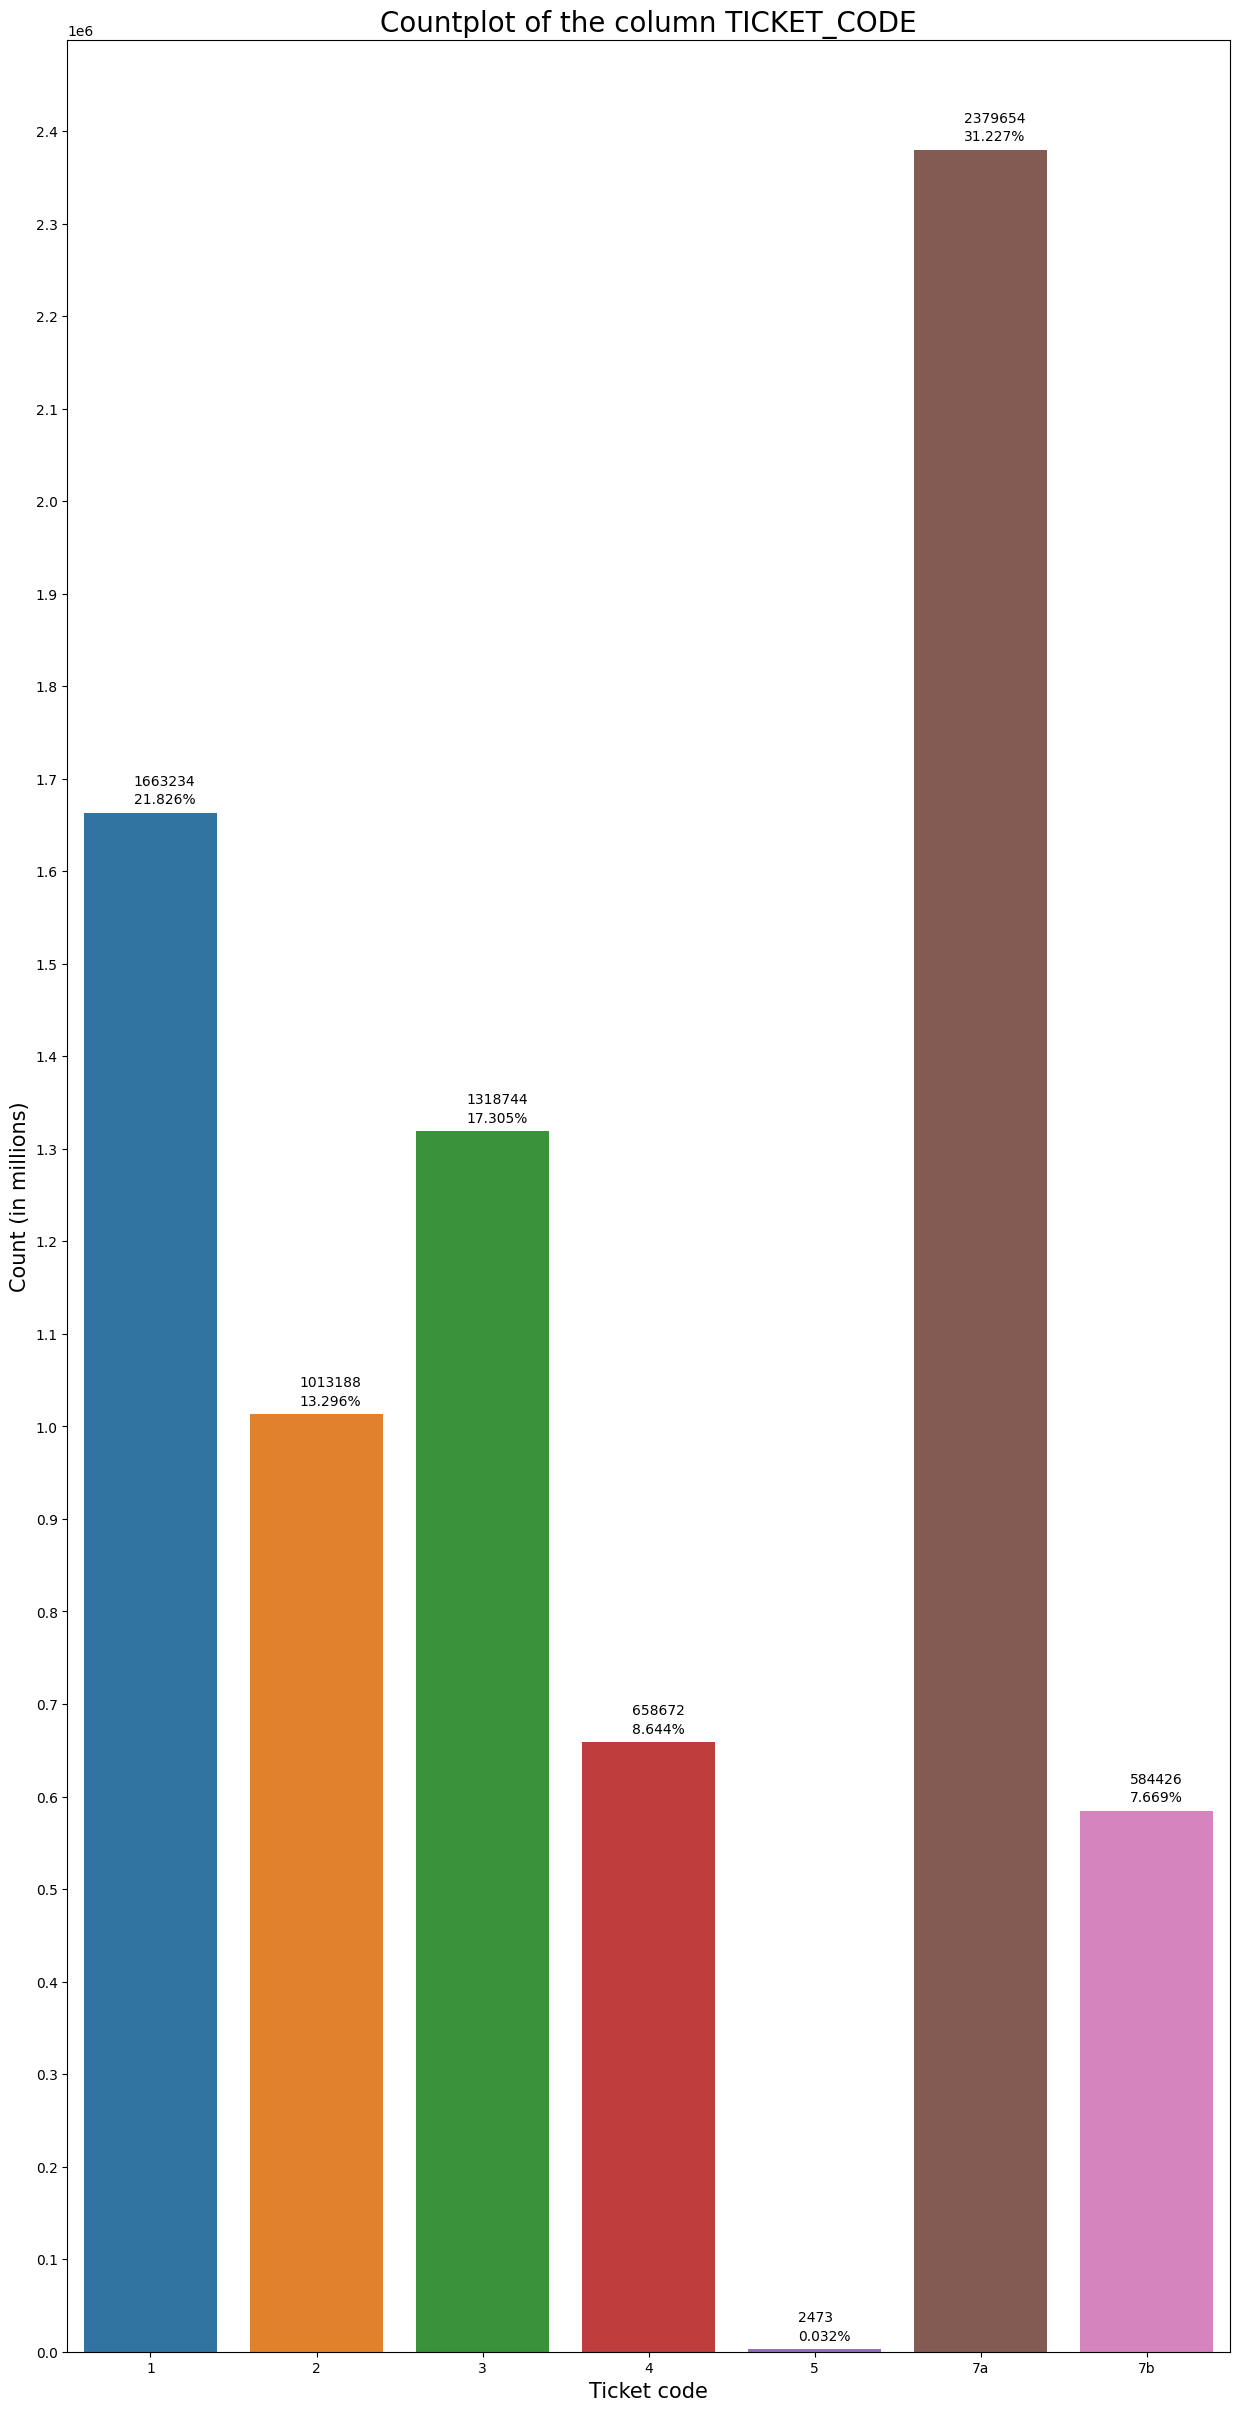

In [129]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

plt.show()

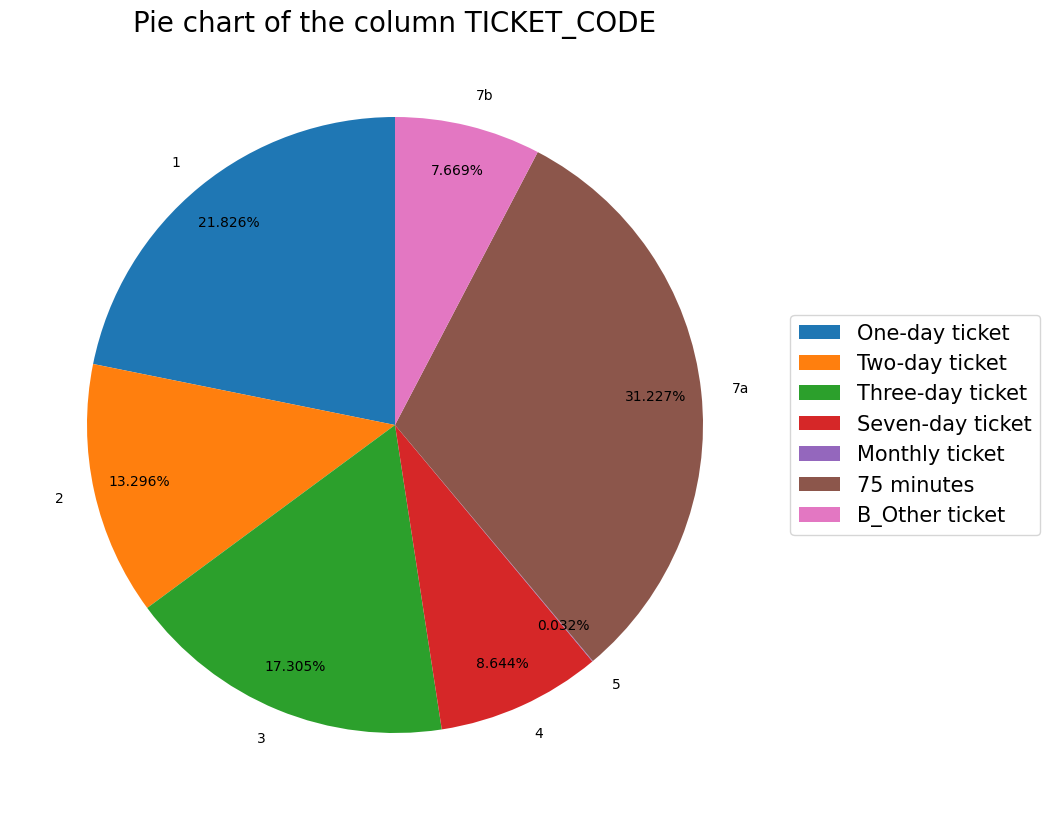

In [130]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(autopct='%1.3f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Focus on Montly tickets

In [131]:
# Find the 'FERMATA' and 'DESCRIZIONE' distributions of the monthly tickets
df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index()

print('The number of different stops (FERMATA) where the monthly tickets are used is: {}'.format(len(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index())))
print('The stops (FERMATA) where the monthly tickets are used are: {}'.format(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index().index))
print('The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: {}'.format(df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index))

The number of different stops (FERMATA) where the monthly tickets are used is: 2
The stops (FERMATA) where the monthly tickets are used are: Int64Index([5004, 7777], dtype='int64')
The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: Index(['PEOPLE MOVER', 'S.Elena-Stad'], dtype='object')


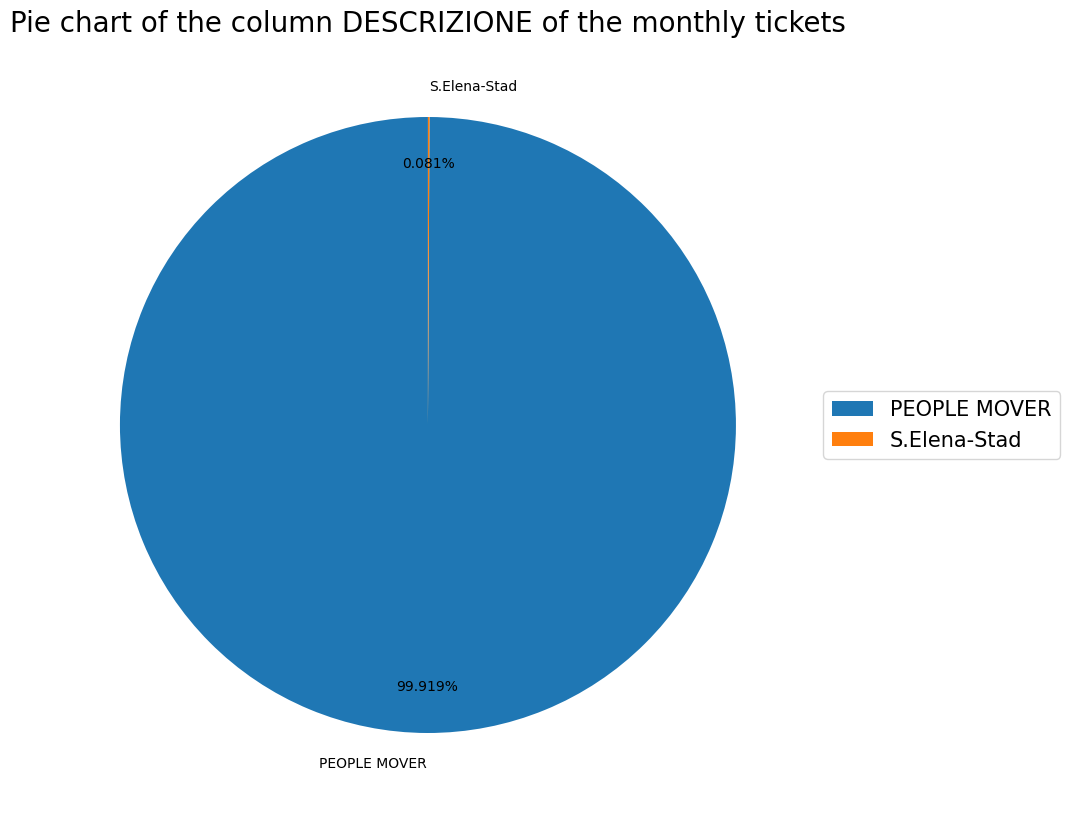

In [132]:
# Plot a pie chart of the column 'DESCRIZIONE' of the monthly tickets
fig, ax = plt.subplots(figsize=(20,10))
df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().plot.pie(autopct='%1.3f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column DESCRIZIONE of the monthly tickets', fontsize=20)
plt.ylabel('')

fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 7b (other tickets) 

In [134]:
shape_before = df.shape[0]

# Delete 7b tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '7b']

# Print the number of rows before and after the deletion of the 7b tickets and the difference
print('The number of rows before the deletion of the 7b tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 7b tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

The number of rows before the deletion of the 7b tickets is: 7620391
The number of rows after the deletion of the 7b tickets is: 7035965
The difference is: 584426


## Data Cleaning

### Useless stamps

In [135]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata

In [137]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
    print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 4 is: 41679293073258756
The serial with the hightest number of validations for the ticket profile 2 is: 41675643963691780
The serial with the hightest number of validations for the ticket profile 3 is: 40549743932450308
The serial with the hightest number of validations for the ticket profile 1 is: 40831218909282052
The serial with the hightest number of validations for the ticket profile 7a is: 36428675838251524
The serial with the hightest number of validations for the ticket profile 5 is: 36144856468188676


In [ ]:
# Operation with DATA_VALIDAZIONE
# calculate the gap between the validations of the same serial
# df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'])
# df['DATA_VALIDAZIONE'] = df['DATA_VALIDAZIONE'].dt.strftime('%d/%m/%Y %H:%M')

# Sort the dataframe by the column 'SERIALE' and 'DATA_VALIDAZIONE'
# df = df.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE'])

# Calculate the gap between the validations of the same serial
# df['GAP'] = df.groupby('SERIALE')['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60


In [ ]:
# print the head of the dataframe to see the new column 'GAP'
# df.head()

In [ ]:
# Given the serial with the hightest number of validations, find the time gap between the validations
# df[df['SERIALE'] == dict_serial['1']]

# For the validation in the same day, find the time gap between the validations
#df[df['SERIALE'] == dict_serial['1']]['DATA_VALIDAZIONE']

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO,TICKET_CODE
3081845,20/06/2022 13:18,40831218909282052,5028,"P.le Roma ""E",11261,DAILY PASS VENEZIA - AVM,1
3084478,20/06/2022 13:49,40831218909282052,5028,"P.le Roma ""E",11261,DAILY PASS VENEZIA - AVM,1
3114639,20/06/2022 19:07,40831218909282052,5028,"P.le Roma ""E",11261,DAILY PASS VENEZIA - AVM,1
3123938,20/06/2022 22:36,40831218909282052,5043,San Toma',11261,DAILY PASS VENEZIA - AVM,1
3123939,20/06/2022 22:36,40831218909282052,5043,San Toma',11261,DAILY PASS VENEZIA - AVM,1
3123940,20/06/2022 22:36,40831218909282052,5043,San Toma',11261,DAILY PASS VENEZIA - AVM,1
3123972,20/06/2022 22:37,40831218909282052,5043,San Toma',11261,DAILY PASS VENEZIA - AVM,1
3123973,20/06/2022 22:37,40831218909282052,5043,San Toma',11261,DAILY PASS VENEZIA - AVM,1
3123974,20/06/2022 22:37,40831218909282052,5043,San Toma',11261,DAILY PASS VENEZIA - AVM,1
3123975,20/06/2022 22:37,40831218909282052,5043,San Toma',11261,DAILY PASS VENEZIA - AVM,1


In [ ]:
# Print the shape of the dataframe
# print('The shape of the dataframe is: {}'.format(df.shape))

In [ ]:
# The timestamp is in the column 'DATA_VALIDAZIONE' in the format '%d/%m/%Y %H:%M'
# If there are more than one validation for the same user (SERIALE) in 2 minutes, then the validation is considered as a mistake so keep only the last validation for each user in 2 minutes

# Sort the dataframe by the column 'SERIALE' and the column 'DATA_VALIDAZIONE'
# df_sort = df.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE'])

# Print the head of the dataframe to see the new order of the rows
# df_sort.head(20)

In [ ]:
# Create a new column 'DATA_VALIDAZIONE_2' that is the column 'DATA_VALIDAZIONE' shifted by 1 row
# df_sort['DATA_VALIDAZIONE_2'] = df_sort['DATA_VALIDAZIONE'].shift(1)

# Print the head of the dataframe to see the new column 'DATA_VALIDAZIONE_2'
# df_sort.head(20)

In [ ]:
# Create a new column 'SERIALE_2' that is the column 'SERIALE' shifted by 1 row
# df_sort['SERIALE_2'] = df_sort['SERIALE'].shift(1)

# Print the head of the dataframe to see the new column 'SERIALE_2'
# df_sort.head(20)

In [ ]:
# fill the NaN values with 0
# df_sort['SERIALE_2'] = df_sort['SERIALE_2'].fillna(0)
# df_sort['DATA_VALIDAZIONE_2'] = df_sort['DATA_VALIDAZIONE_2'].fillna(0)

In [ ]:
# Create a new column 'DIFF' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2'
# df_sort['DIFF'] = pd.to_datetime(df_sort['DATA_VALIDAZIONE']) - pd.to_datetime(df_sort['DATA_VALIDAZIONE_2'])

# Print the head of the dataframe to see the new column 'DIFF'
# df_sort.head(20)

In [ ]:
# Create a new column 'DIFF_MINUTES' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' in minutes
# df['DIFF_MINUTES'] = df['DIFF'].dt.total_seconds()/60

# Print the head of the dataframe to see the new column 'DIFF_MINUTES'
# df.head()

In [ ]:
# If the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' is less than 2 minutes and the column 'SERIALE' is equal to the column 'SERIALE_2', then the validation is considered as a mistake
# So keep only the last validation for each user in 2 minutes
# df_to_drop = df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])]
# df = df.drop(df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])].index)

### Stops similar

In [138]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 735


In [139]:
# Define a function that returns the common prefix of a list of strings
def get_common_prefix(string_list):
    # input di tipo  string_list = ["Mestre Centro", "Mirano Centro"]
    first_prefix = string_list[0].split(" ")[0]
    # create and empty dictionary
    prefix_dict = {}

    for string in string_list[1:]:
        if not string.startswith(first_prefix):
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict
    

In [140]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [141]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

FERROVIA: ['FERROVIA "D"', 'FERROVIA "B"', 'FERROVIA "E"', 'FERROVIA "C"', 'FERROVIA "A"']
P.LE: ['P.LE ROMA "G', 'P.LE ROMA "E', 'P.LE ROMA "B', 'P.LE ROMA "F', 'P.LE ROMA "C', 'P.LE ROMA "D', 'P.LE ROMA "A']
VENEZIA: ['VENEZIA', 'VENEZIA CORS', 'VENEZIA RAMP', 'VENEZIA PIAZ']
GIUDECCA: ['GIUDECCA PAL']
S.: ['S. MARCUOLA-', 'S.ERASMO CHI', 'S.ERASMO CAP', 'S. ERASMO PU', 'S. MARCO (GI', 'S. PIETRO IN', 'S. SAMUELE', 'S. MARCO-SAN', 'S.ELENA-STAD', 'S. ANGELO', 'S. MARCO VAL', 'S. MARIA DEL', 'S. ALVISE', 'S. BASILIO', 'S. STAE', 'S. PIETRO DI', 'S. TOMA\' "B"', 'S. SILVESTRO', 'S. MARTA', 'S. GIORGIO', 'S. SERVOLO', 'S. LAZZARO', 'S. ERASMO CA', 'S. TOMA\' "A"', 'S. ERASMO CH', 'S. MARCO GIA']
SAN: ['SAN MARCO-SA', 'SAN MARCO VA', 'SAN STAE', 'SAN MARCO MA', 'SANTA MARIA ', "SAN TOMA'", 'SAN ROCCO BR', 'SAN GIORGIO', "SANT' ELENA", 'SANTA MARTA', "SAN DONA' RI", "SAN DONA' PA", 'SAN MARCO CA', "SANT' ANGELO", "SANT'ANTONIO", "SAN DONA' PI", 'SAN SAMUELE', "SAN DONA' MA", 'SAN MARCO MO

#### Update some keys in the dictionary

In [142]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [143]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. MARCUOLA-', 'S.ERASMO CHI', 'S.ERASMO CAP', 'S. ERASMO PU', 'S. MARCO (GI', 'S. PIETRO IN', 'S. SAMUELE', 'S. MARCO-SAN', 'S.ELENA-STAD', 'S. ANGELO', 'S. MARCO VAL', 'S. MARIA DEL', 'S. ALVISE', 'S. BASILIO', 'S. STAE', 'S. PIETRO DI', 'S. TOMA\' "B"', 'S. SILVESTRO', 'S. MARTA', 'S. GIORGIO', 'S. SERVOLO', 'S. LAZZARO', 'S. ERASMO CA', 'S. TOMA\' "A"', 'S. ERASMO CH', 'S. MARCO GIA']
The values of the dictionary with the key San are: ['SAN MARCO-SA', 'SAN MARCO VA', 'SAN STAE', 'SAN MARCO MA', 'SANTA MARIA ', "SAN TOMA'", 'SAN ROCCO BR', 'SAN GIORGIO', "SANT' ELENA", 'SANTA MARTA', "SAN DONA' RI", "SAN DONA' PA", 'SAN MARCO CA', "SANT' ANGELO", "SANT'ANTONIO", "SAN DONA' PI", 'SAN SAMUELE', "SAN DONA' MA", 'SAN MARCO MO', 'SAN SILVESTR', 'SAN MARCO BO', 'SAN MARCO FO', 'SAN MARCO MU', 'SAN MARCO SA', "SAN NICOLO'", "SAN DONA' CE", "SANT' ALVISE", 'SAN SERVOLO', 'SAN BASILIO', "SAN DONA' VA", "SAN DONA' FA", 'SAN PIETRO D', "SAN N

##### S.Erasmo

In [144]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S.ERASMO CHI', 'S.ERASMO CAP', 'S. ERASMO PU']


##### San Marco

In [145]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO-SA', 'SAN MARCO VA', 'SAN MARCO MA', 'SAN MARCO CA', 'SAN MARCO MO', 'SAN MARCO BO', 'SAN MARCO FO', 'SAN MARCO MU', 'SAN MARCO SA', 'S. MARCO (GI']


##### San Dona'

In [146]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA' RI", "SAN DONA' PA", "SAN DONA' PI", "SAN DONA' MA", "SAN DONA' CE", "SAN DONA' VA", "SAN DONA' FA", "SAN DONA' PE"]


#### San Pietro

In [147]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SAN PIETRO D', 'SAN PIETRO P', 'SANPIETRO CA', 'SAN PIETRO C', 'SAN PIETRO B', 'S. PIETRO IN', 'S. PIETRO DI']


#### Ca' Rossa

In [148]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA OB", "CA' ROSSA VO", "CA' ROSSA SE", "CA' ROSSA BI"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [149]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
for value in dict_prefix['S.']:
    dict_prefix[value] = [value]

for value in dict_prefix['SAN']:
    dict_prefix[value] = [value]

for value in dict_prefix['SANTA']:
    dict_prefix[value] = [value]

for value in dict_prefix['SANT\'']:
    dict_prefix[value] = [value]

for value in dict_prefix['CA\'']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZA']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZALE']:
    dict_prefix[value] = [value]

for value in dict_prefix['VIA']:
    dict_prefix[value] = [value]

for value in dict_prefix['STAZIONE']:
    dict_prefix[value] = [value]

for value in dict_prefix['TREVISO']:
    dict_prefix[value] = [value]

for value in dict_prefix['TRENTO']:
    dict_prefix[value] = [value]

for value in dict_prefix['INCR.']:
    dict_prefix[value] = [value]

for value in dict_prefix['DE']:
    dict_prefix[value] = [value]



# Remove the keys 'S.' and 'San' witout printing the values
dict_prefix.pop('S.')
dict_prefix.pop('SAN')
dict_prefix.pop('SANTA')
dict_prefix.pop('SANT\'')
dict_prefix.pop('CA\'')
dict_prefix.pop('PIAZZA')
dict_prefix.pop('PIAZZALE')
dict_prefix.pop('VIA')
dict_prefix.pop('STAZIONE')
dict_prefix.pop('TREVISO')
dict_prefix.pop('TRENTO')
dict_prefix.pop('INCR.')
dict_prefix.pop('DE')

['DESE CENTRO',
 'DEI MURAZZI ',
 'DESE CICOGNE',
 'DESE FS',
 'DESE LITOMAR',
 'DE NICOLA CH',
 'DELLE MESSI ']

#### Treviso and Trento

In [150]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI']


#### Keys with only an item

In [151]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [152]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

FERROVIA: ['FERROVIA "D"', 'FERROVIA "B"', 'FERROVIA "E"', 'FERROVIA "C"', 'FERROVIA "A"']
VENEZIA: ['VENEZIA', 'VENEZIA CORS', 'VENEZIA RAMP', 'VENEZIA PIAZ']
PIAVE: ['PIAVE FIUME', 'PIAVE PUCCIN', 'PIAVE PODGOR']
RIALTO: ['RIALTO', 'RIALTO MERCA', 'RIALTO "A"', 'RIALTO "C"', 'RIALTO "D"', 'RIALTO "B"']
PELLESTRINA: ['PELLESTRINA', 'PELLESTRINA ']
ACCADEMIA: ['ACCADEMIA "B', 'ACCADEMIA "A']
LIDO: ['LIDO S.M.E. ', 'LIDO SAN NIC', 'LIDO S. NICO']
MESTRE: ['MESTRE CENTR', 'MESTRE VIA A', 'MESTRE VIA P', 'MESTRE VIA T', 'MESTRE RAMPA', 'MESTRE PIAZZ', 'MESTRE VIA M', 'MESTRE VIA H']
SPINEA: ['SPINEA MARTI', 'SPINEA GIORG', 'SPINEA ALFIE', 'SPINEA PIAZZ', 'SPINEA POZZU', 'SPINEA ROSSI', 'SPINEA DESEN', 'SPINEA VILLA', 'SPINEA SANRE', 'SPINEA ORGNA', 'SPINEA REPUB', 'SPINEA CENTR', 'SPINEA SAN R']
ZATTERE: ['ZATTERE', 'ZATTERE "B"', 'ZATTERE "A"']
LIBERTA': ["LIBERTA' SAN", "LIBERTA' RIG", "LIBERTA' FIN", "LIBERTA' POR", "LIBERTA' COM"]
DON: ['DON STURZO V', 'DON STURZO P']
TRONCHETTO: ['TR

In [153]:
# Export the dictionary in a json file
import json
with open('dict_prefix.json', 'w') as fp:
    json.dump(dict_prefix, fp)

In [154]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
df_new.to_csv('data/dataset_cleaned.txt', sep='\t', index=False)

print('The script has finished')


KeyboardInterrupt: 